In [4]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
X = x_train[87]

In [9]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
X.shape

(28, 28)

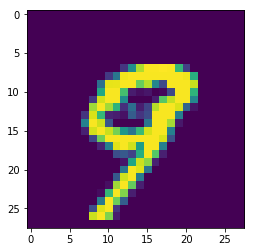

In [11]:
plt.imshow(X)

In [12]:
y_train[87]

9

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [16]:
from keras.utils import np_utils

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [19]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [21]:
model = Sequential()

In [ ]:
model.add(Dense(4, input_dim=784))
model.add(Activation('sigmoid'))

In [ ]:
model.add(Dense(2))

In [ ]:
model.add(Activation('sigmoid'))

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='mse', optimizer=SGD(lr = 0.087), metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
4*2 + 2

10

In [ ]:
784*4+4

3140

In [ ]:
2*10

20

In [ ]:
#model.fit(x_train, y_train, batch_size=100, epochs=20)

In [ ]:
from ipywidgets import interact_manual

In [ ]:
predict = model.predict_classes(x_test)

In [ ]:
predict

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28, 28)m cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [ ]:
test(87)

In [ ]:
interact_manual(test, 測試編號=(0,9999))

In [ ]:
score = model.evaluate(x_test, y_test)

In [ ]:
print('loss:', score[0])
print('正確率', score[1])

In [ ]:
model_json = model.to_json()
open('example_model.json', 'w').write(model_json)
model.save_weights('example_model_weights.h5')